<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-Learning-Lab-2020/blob/emir/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# placeholder: tensors are feeded externaly for example inputs tensors + output tensors

# variables : tensors represent the parameters of the network/graph ie. nn weights

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])

# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)

# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
iter:  0 cost:  0.9251641
iter:  1 cost:  0.9230196
iter:  2 cost:  0.92087907
iter:  3 cost:  0.9187428
iter:  4 cost:  0.91661054
iter:  5 cost:  0.9144825
iter:  6 cost:  0.91235864
iter:  7 cost:  0.91023934
iter:  8 cost:  0.90812427
iter:  9 cost:  0.9060138
predicted  [[ 0.5471682   0.6440942  -0.5967087  -0.67613167]
 [-0.02052948  0.6660044  -0.52508885 -1.2014067 ]
 [-0.16581537  0.2078205  -0.5820717  -0.81910884]
 [ 0.57350653  0.5787266  -0.64671475 -0.60521734]
 [-0.14361182  0.7289338  -0.3398015  -1.2688292 ]
 [ 0.69740045  0.55306333 -0.7654652  -0.5365445 ]
 [-0.24848664  0.25887492 -0.26260936 -0.7398072 ]
 [-1.1884054  -0.08317816  0.57125366 -0.6488136 ]
 [ 0.20469603  0.5664025  -0.10122199 -0.56752527]
 [-0.08939911  0.37532228 -0.3440038  -0.7855734 ]]
real  [[0.49760204 0.31353225 0.32040492 0.18017236]
 [0.53975364 0.13458741 0.75629457 0.74584247]
 [0.50628167 0.6046

In [3]:
sess = tf.Session() 
sess.run(init)
    
for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
print('predicted ', y_p_p)
print('real ', y_gr)

#sess.close()

iter:  0 cost:  2.3408885
iter:  1 cost:  2.337693
iter:  2 cost:  2.3345027
iter:  3 cost:  2.3313174
iter:  4 cost:  2.3281372
iter:  5 cost:  2.3249626
iter:  6 cost:  2.3217936
iter:  7 cost:  2.3186297
iter:  8 cost:  2.3154721
iter:  9 cost:  2.3123195
predicted  [[ 0.24237497 -0.4789864  -2.2616656   0.32732666]
 [ 0.1757657  -0.2780663  -3.2778995   0.30318576]
 [-0.05248906 -0.07198967 -1.0122445  -0.7143535 ]
 [ 0.20904909 -0.47046933 -1.8423275   0.12277   ]
 [ 0.21928076 -0.23788953 -3.9112666   0.7139541 ]
 [ 0.19450398 -0.5173181  -1.4469794  -0.09736606]
 [ 0.01873198 -0.02859414 -1.6016804  -0.07015004]
 [-0.11140423  0.50781876 -1.6900215   0.4657509 ]
 [ 0.25245225 -0.2808039  -2.6599216   0.95686954]
 [ 0.07728175 -0.13389206 -1.9357418   0.05742874]]
real  [[0.49760204 0.31353225 0.32040492 0.18017236]
 [0.53975364 0.13458741 0.75629457 0.74584247]
 [0.50628167 0.60462236 0.85903408 0.27639893]
 [0.613447   0.91151207 0.05404809 0.8225853 ]
 [0.32284177 0.97469127 0

In [ ]:
%tensorflow_version 1.x


TensorFlow is already loaded. Please restart the runtime to change versions.


In [4]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4
#  O   O   O   O
#  O   O   O   O
#  O   O   O   O
#      O   O   O
#          O   
#          O   
#          O   
#          O   
#          O   
#          O   


num_samples= 10

# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])

# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))

#F(WX+b)
# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer

#placeholders/inputs:outpus --> Variables/Weights --> Model --> cost --> optimizer --> initilize all variables --> start the session

# cost
cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  2.3913162
iter:  1 cost:  2.368434
iter:  2 cost:  2.3456938
iter:  3 cost:  2.3230968
iter:  4 cost:  2.3006427
iter:  5 cost:  2.2783332
iter:  6 cost:  2.25617
iter:  7 cost:  2.2341537
iter:  8 cost:  2.2122865
iter:  9 cost:  2.1905699
predicted  [[ 2.4571824  -1.4728684  -0.5035786   0.36105055]
 [ 2.3783302  -1.4778717  -0.5346699   0.35490805]
 [ 2.38185    -1.4839454  -0.4710874   0.32579368]
 [ 2.5402606  -1.465323   -0.52372813  0.39299434]
 [ 2.4191535  -1.4801881  -0.48079252  0.34057873]
 [ 2.238059   -1.4360793  -0.7165757   0.35904354]
 [ 2.2775388  -1.4477401  -0.7195281   0.37194544]
 [ 2.3408968  -1.484036   -0.47707683  0.3162409 ]
 [ 2.1307628  -1.4887321  -0.5778211   0.2486881 ]
 [ 2.302291   -1.4316609  -0.72863585  0.40350646]]
real  [[0.80995619 0.40487275 0.51567326 0.20287189]
 [0.80964951 0.54433139 0.44038155 0.63512801]
 [0.62686723 0.66426488 0.14256951 0.60394398]
 [0.00829485 0.67945396 0.94180642 0.74680466]
 [0.32816447 0.45940143 0.1

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

(55000, 784)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


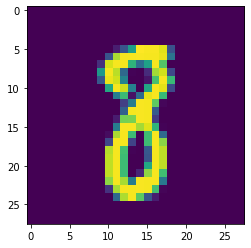

In [5]:
%matplotlib inline

from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

display(mnist.train.images.shape) # 28*28 = 784

image =mnist.train.images[50].reshape((28,28))
#MNIST data input (img shape: 28*28)
imshow(image)

print(mnist.train.labels[0])

In [7]:
import time 
tic = time.clock()


In [8]:
import tensorflow as tf

# training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# testing data
X_test = mnist.test.images
Y_test = mnist.test.labels

# training data validation
X_val = mnist.validation.images
Y_val = mnist.validation.labels

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10 #digits 0 to 9

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])

# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))

# model
h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

# Evaluate model
# equal gives value of 0 or 1
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))# equal gives value of 0 or 1

## 3 images, y_p=[[0.1,0.0,0,0.9],[0.9,0.1,0,0.],[0,0.9,0,0.1]] 

# tf.argmax(y_p, 1) [3,0,1] 

# 3 images, y=[[0,0.0,0,1],[0,1,0,0],[0,1,0,0]] 

# tf.argmax(y, 1) [3,1,1]

# tf.equal [True,False,True]--[1,0,1]--- 2/3 

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# optimisation 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
init = tf.global_variables_initializer()
tic = time.clock()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        # next_batch randomly sample out input and output data
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    #print('predicted ', y_p_p)
    #print('real ', y_gr)



toc = time.clock()
toc-tic

iter:  0 train_cost:  7.776774 train_acc:  0.078125 test_cost:  8.003578 test_acc:  0.0703125
iter:  1 train_cost:  7.363817 train_acc:  0.09375 test_cost:  7.689084 test_acc:  0.0859375
iter:  2 train_cost:  7.3448086 train_acc:  0.078125 test_cost:  7.3347645 test_acc:  0.109375
iter:  3 train_cost:  7.994915 train_acc:  0.03125 test_cost:  7.1498027 test_acc:  0.1015625
iter:  4 train_cost:  6.3591423 train_acc:  0.125 test_cost:  6.8996615 test_acc:  0.1015625
iter:  5 train_cost:  6.3060822 train_acc:  0.078125 test_cost:  6.540539 test_acc:  0.09375
iter:  6 train_cost:  6.0850754 train_acc:  0.09375 test_cost:  6.643146 test_acc:  0.125
iter:  7 train_cost:  6.1605635 train_acc:  0.0859375 test_cost:  6.017409 test_acc:  0.0859375
iter:  8 train_cost:  6.249713 train_acc:  0.109375 test_cost:  6.141265 test_acc:  0.078125
iter:  9 train_cost:  6.2297144 train_acc:  0.0625 test_cost:  5.7736893 test_acc:  0.078125
iter:  10 train_cost:  6.2364616 train_acc:  0.0859375 test_cost: 

12.378722

In [ ]:
# 10.579477999999998 TPU
# 10.682025999999999 CPU
# 8.640348 GPU 


# CNN using Tensorflow




In [9]:
n_classes=10
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # x input image, W..weights is a tamplate(3d matrix for images),
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # x 28x28x32
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 28, 28, 1]) # if coloured it will be 3 not 1

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    print('con1_before max',conv1.get_shape().as_list())

    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=1)
    print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    print('con2_before max',conv2.get_shape().as_list())

    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=1)
    print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]]) #[-1,7*7*64]
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout) #droput  between 0 and 1, represents %

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])), #2^n makes it more efficent on gpus
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p = conv_net(x, weights, biases)

#crossentropy cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# optimisation 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



con1_before max [None, 28, 28, 32]
con1_after max [None, 28, 28, 32]
con2_before max [None, 28, 28, 64]
con2_after max [None, 28, 28, 64]


InvalidArgumentError: ignored